## Training Example

In [1]:
from tf_object_detection_util.training_api import train

In [2]:
def trainObjDetectorTest():
    trainDir = '/home/prasannals/Downloads/handsup/raw/'
    predictDir = 'tf_test_out'
    fineTunedModelPath = '/home/prasannals/models/research/object_detection/ssd_mobilenet_v1_coco_2018_01_28/model.ckpt'
    tfObjectDetFolder = '/home/prasannals/models/research/object_detection'
    # o.labelObjects(trainDir, predictDir, fineTunedModelPath, tfObjectDetFolder)
    train(trainDir, fineTunedModelPath, tfObjectDetFolder, destn=predictDir)

In [3]:
trainObjDetectorTest()
# Interrupt the kernel to stop training. This will also automatically create and save the inference graph

Copied 407 training files
Copied 102 test files
Successfully created the TFRecords: tf_test_out/train.record
Successfully created the TFRecords: tf_test_out/valid.record
For training (from the object_detection/legacy directory) :
python /home/prasannals/models/research/object_detection/legacy/train.py --logtostderr --train_dir=/home/prasannals/tf_test_out/trainOutput --pipeline_config_path=/home/prasannals/tf_test_out/ssd_mobilenet_v1.config

To generate inference graph (after training) (from the object_detection directory) :
python /home/prasannals/models/research/object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path /home/prasannals/tf_test_out/ssd_mobilenet_v1.config --trained_checkpoint_prefix /home/prasannals/tf_test_out/trainOutput/YOUR_MODEL_FILE --output_directory /home/prasannals/tf_test_out/inference_graph
Training done
Inference graph written to tf_test_out/inference_graph
Training command used - 
python /home/prasannals/models/research/

## Inference Example

In [1]:
from tf_object_detection_util.inference_api import TFInference
from pathlib import Path
from tf_object_detection_util.inference_api.util import cv2_imread_rgb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_faster_rcnn_open_images():
    MODEL_NAME = Path('/home/prasannals/models/research/object_detection/faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12')
    PATH_TO_FROZEN_GRAPH = MODEL_NAME / 'frozen_inference_graph.pb'
    PATH_TO_LABELS = MODEL_NAME / 'oid_v4_label_map.pbtxt'

    inf = TFInference(PATH_TO_FROZEN_GRAPH, PATH_TO_LABELS)
    return inf

In [3]:
inf = load_faster_rcnn_open_images()

In [4]:
inp_path = '/home/prasannals/test.jpg'
img = cv2_imread_rgb(inp_path)

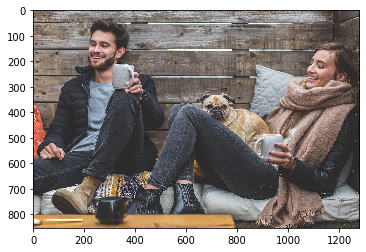

In [5]:
plt.imshow(img)

In [6]:
res, res_img = inf.predict(inp_path, visualize=True)

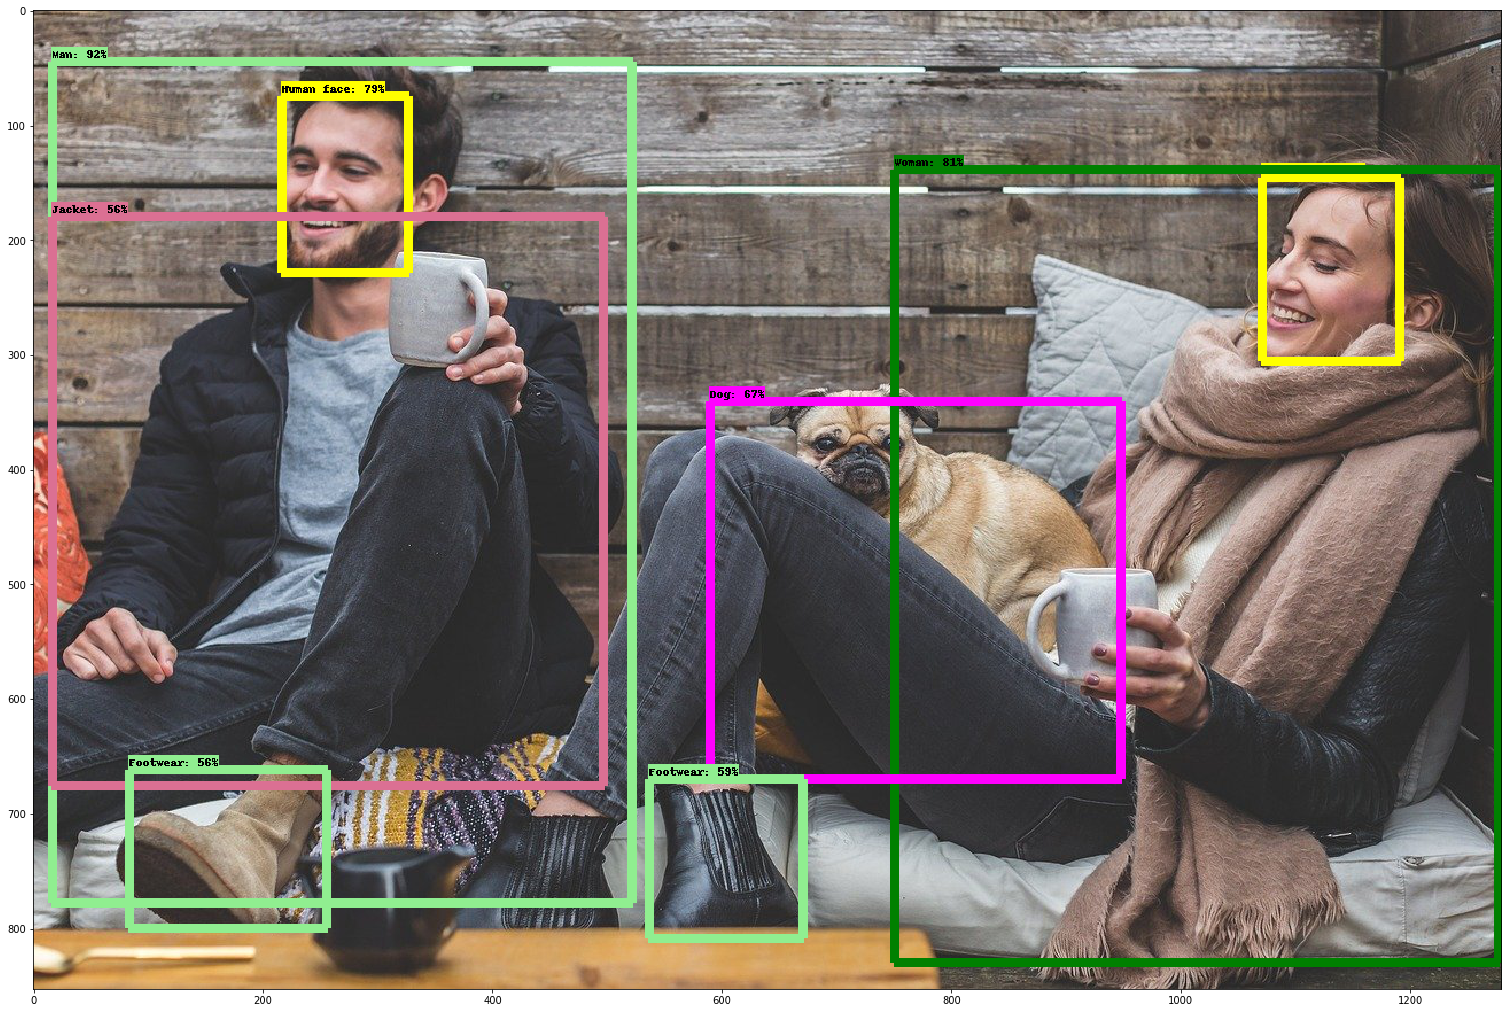

In [7]:
plt.figure(figsize=(16*2, 9*2))
plt.imshow(res_img)

In [8]:
plt.imsave('/home/prasannals/test_bbox.jpg', res_img)

In [9]:
## close the inference object
inf.close()